In [30]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# to load and to extract Zip file 
import zipfile
import os
# to load images and cv2 for image preprocessing
import cv2
import os
import glob

# importinr required library for, bounding box plotting 
import matplotlib.patches as patches

# PROBLEM STATEMENT

### DOMAIN:  Automotive Surveillance.

### CONTEXT :
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is 
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of 
the car, type, colour, number plates etc.

### DATA DESCRIPTION:

The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.

### Data description:

**Train Images:** Consists of real images of cars as per the make and year of the car. 
**Test Images:** Consists of real images of cars as per the make and year of the car.
**Train Annotation:** Consists of bounding box region for training images.
**Test Annotation:** Consists of bounding box region for testing images.


Dataset has been attached along with this project. Please use the same for this capstone project.
Original link to the dataset for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your 
reference only ]

Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE 
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
• PROJECT OBJECTIVE: Design a DL based car identification model

### PROJECT OBJECTIVE: 
Design a DL based car identification model.

## PROJECT TASK: [ Score: 100 points]
##  Milestone 1: [ Score: 40 points]
#### Input: Context and Dataset
#### Process: 
- Step 1: Import the data. [ 3 points ]
- Step 2: Map training and testing images to its classes. [ 6 points ]
- Step 3: Map training and testing images to its annotations. [ 6 points ]
- Step 4: Display images with bounding box. [ 5 points ]
- Step 5: Design, train and test basic CNN models to classify the car. [ 10 points ]
- Step 6: Interim report [ 10 points ]
### Submission:Interim report, Jupyter Notebook with all the steps in Milestone-1

## 2. Milestone 2: [ Score: 60 points]
#### Input: Preprocessed output from Milestone-1
#### Process: 
- Step 1: Fine tune the trained basic CNN models to classify the car. [ 5 points ]
- Step 2: Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or 
  mask over the area of interest. [10 points]
- Step 3: Pickle the model for future prediction [ 5 Points]
- Step 4: Final Report [40 Points]
### Submission:Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2


## 3. Milestone 3: [ Optional ]
#### Process:
- Step 1: Design a clickable UI based interface which can allow the user to browse & input the image, output the class 
and the bounding box or mask [ highlight area of interest ] of the input image 
### Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface

# 1: extracting Zipfile from problemstatements

### 1 A:Extraxting ziped image file

In [31]:
# creating path for loading and extracting to path
zip_image_file_path = r"/Users/dharmasangeerani/Dharumaraj/Microservices/Car Images.zip"
zip_image_extracted_path =r"/Users/dharmasangeerani/Dharumaraj/Microservices/Car Images"

In [32]:
os.makedirs(zip_image_extracted_path ,exist_ok= True)

In [5]:
with zipfile.ZipFile (zip_image_file_path,'r') as zip_ref:
    zip_ref.extractall(zip_image_extracted_path)

In [33]:
print(f"files extracted to = {zip_image_extracted_path}")

files extracted to = /Users/dharmasangeerani/Dharumaraj/Microservices/Car Images


In [34]:

Zip_image_train_path=r"/Users/dharmasangeerani/Dharumaraj/Microservices/Car Images/Car Images/Train Images"
Zip_image_test_path=r"/Users/dharmasangeerani/Dharumaraj/Microservices/Car Images/Car Images/Test Images"

## 2: creating list of image_path for train and test images folder

## 2A: Creating list of images for train data set

In [37]:
data = []
image_paths_train=[]
# Iterate through the directories and files
for folder_name in os.listdir(Zip_image_train_path):
    folder_path = os.path.join(Zip_image_train_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image_paths_train.append(image_path)
            # Append the folder name and image name to the data list
            data.append({
                'Car Name': folder_name.replace(r'\s*\d{4}$', ''), 
                'Model Year': folder_name.split()[-1],
                'Image Name': image_name
                }
            )

# Convert the list to a Pandas DataFrame
train_df = pd.DataFrame(data)

train_df.shape

(8144, 3)

In [38]:
train_df.head()

Car Name Model Year Image Name
0  Dodge Dakota Crew Cab 2010       2010  06796.jpg
1  Dodge Dakota Crew Cab 2010       2010  04157.jpg
2  Dodge Dakota Crew Cab 2010       2010  00682.jpg
3  Dodge Dakota Crew Cab 2010       2010  07660.jpg
4  Dodge Dakota Crew Cab 2010       2010  00483.jpg

In [39]:
train_df.tail()

Car Name Model Year Image Name
8139  Chevrolet Corvette ZR1 2012       2012  03541.jpg
8140  Chevrolet Corvette ZR1 2012       2012  07479.jpg
8141  Chevrolet Corvette ZR1 2012       2012  07876.jpg
8142  Chevrolet Corvette ZR1 2012       2012  07484.jpg
8143  Chevrolet Corvette ZR1 2012       2012  03185.jpg

**Grouping the data set based on the car calss.**

In [40]:
grouped_train_df = train_df.groupby(['Car Name', 'Model Year']).size().reset_index(name='Image Count')
grouped_train_df.shape

(196, 3)

**Insights on the grouping data**
* There seems to 196 unique car classes available througout the given dataset

In [41]:
grouped_train_df.head()

Car Name Model Year  Image Count
0  AM General Hummer SUV 2000       2000           45
1   Acura Integra Type R 2001       2001           45
2         Acura RL Sedan 2012       2012           32
3         Acura TL Sedan 2012       2012           43
4        Acura TL Type-S 2008       2008           42

**Sorting the grouped data to get an overall view on high and low data set availablitliy for any given class**

In [42]:
grouped_train_df.sort_values(by='Image Count', ascending=False, inplace=True)
print(grouped_train_df.head(1))
print(grouped_train_df.tail(1))

                Car Name Model Year  Image Count
119  GMC Savana Van 2012       2012           68
                      Car Name Model Year  Image Count
129  Hyundai Accent Sedan 2012       2012           24


**Insights on the above data**
* GMC Savana Van of model year 2012 seems to have the most number of images for training set.
* Hyundai Accent Sedan 2012 seems to have the lowest number of images for the training set.

### Data Visualization for training set

**Plotting bar char to identify the total training set for a car class belonging to available model years**

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/1843422505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Year', y='Image Count', data=model_year_count, palette='coolwarm')


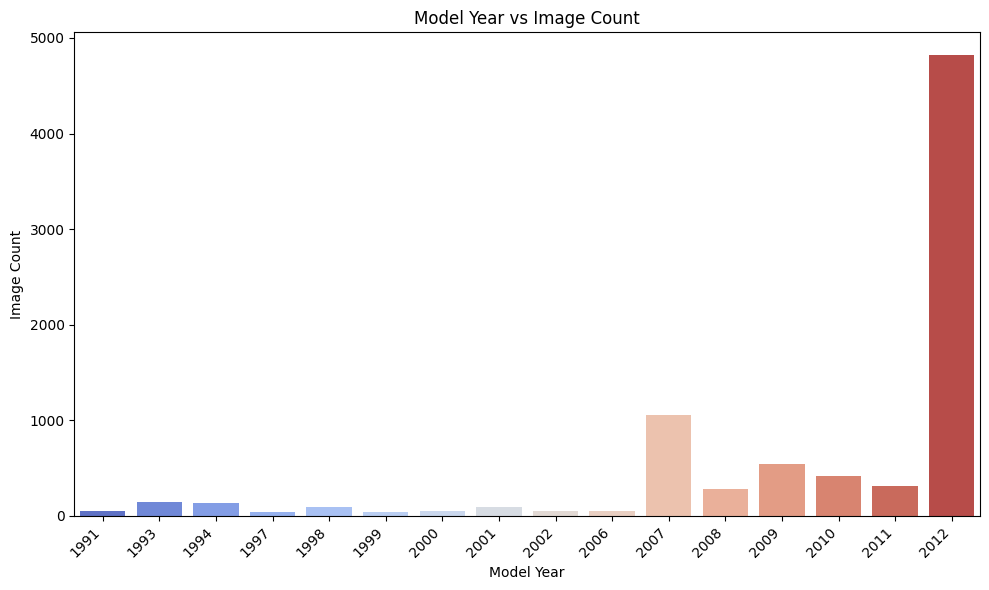

In [43]:
model_year_count = train_df.groupby('Model Year').size().reset_index(name='Image Count')

# --- Plot: Model Year vs Image Count using Seaborn ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Year', y='Image Count', data=model_year_count, palette='coolwarm')
plt.xlabel('Model Year')
plt.ylabel('Image Count')
plt.title('Model Year vs Image Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**Insights from the above bar chart**
* most of the images sets seems to be of car class with model year 2012 and 2007.
* Rest of the model year data seems to be evently distrubuted across two batches, one is 2008 to 2011 and the other one is 1500 to 2006 followed by 2500 to 3500.
* There seems to be an unusal year data like 1500, 2500 and 3500 which seems like an outlier inthe given data set. Data cleaning should be performed to remove such outliers.

**Plotting  car name and count the number of images per car**

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/3754134915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car Name', y='Image Count', data=car_name_count, palette='viridis')


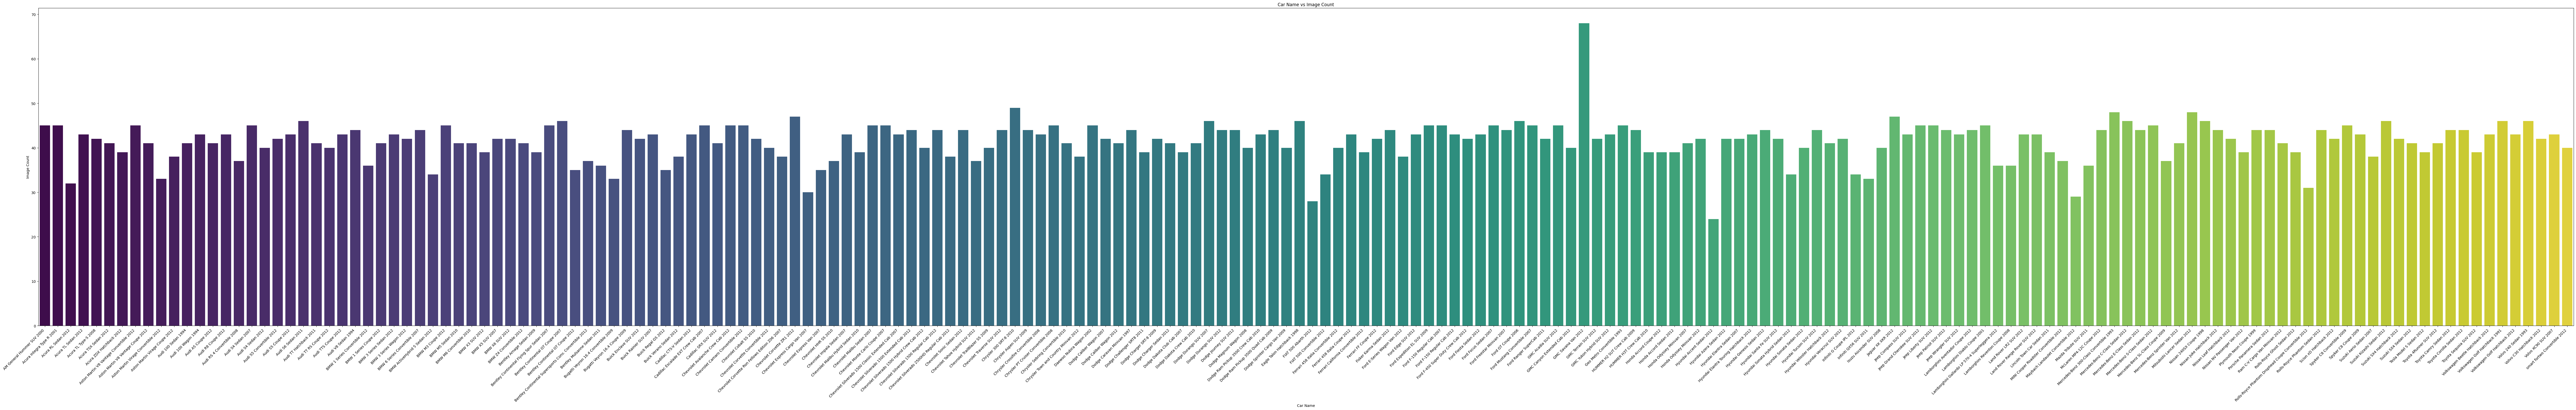

In [44]:
# Group by car name and count the number of images per car
car_name_count = train_df.groupby('Car Name')['Image Name'].count().reset_index(name='Image Count')

# --- Plot: Car Name vs Image Count using Seaborn ---
plt.figure(figsize=(100, 16))
sns.barplot(x='Car Name', y='Image Count', data=car_name_count, palette='viridis')
plt.xlabel('Car Name')
plt.ylabel('Image Count')
plt.title('Car Name vs Image Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/779336639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image Count', y='Car Name', data=car_name_count, palette='viridis')


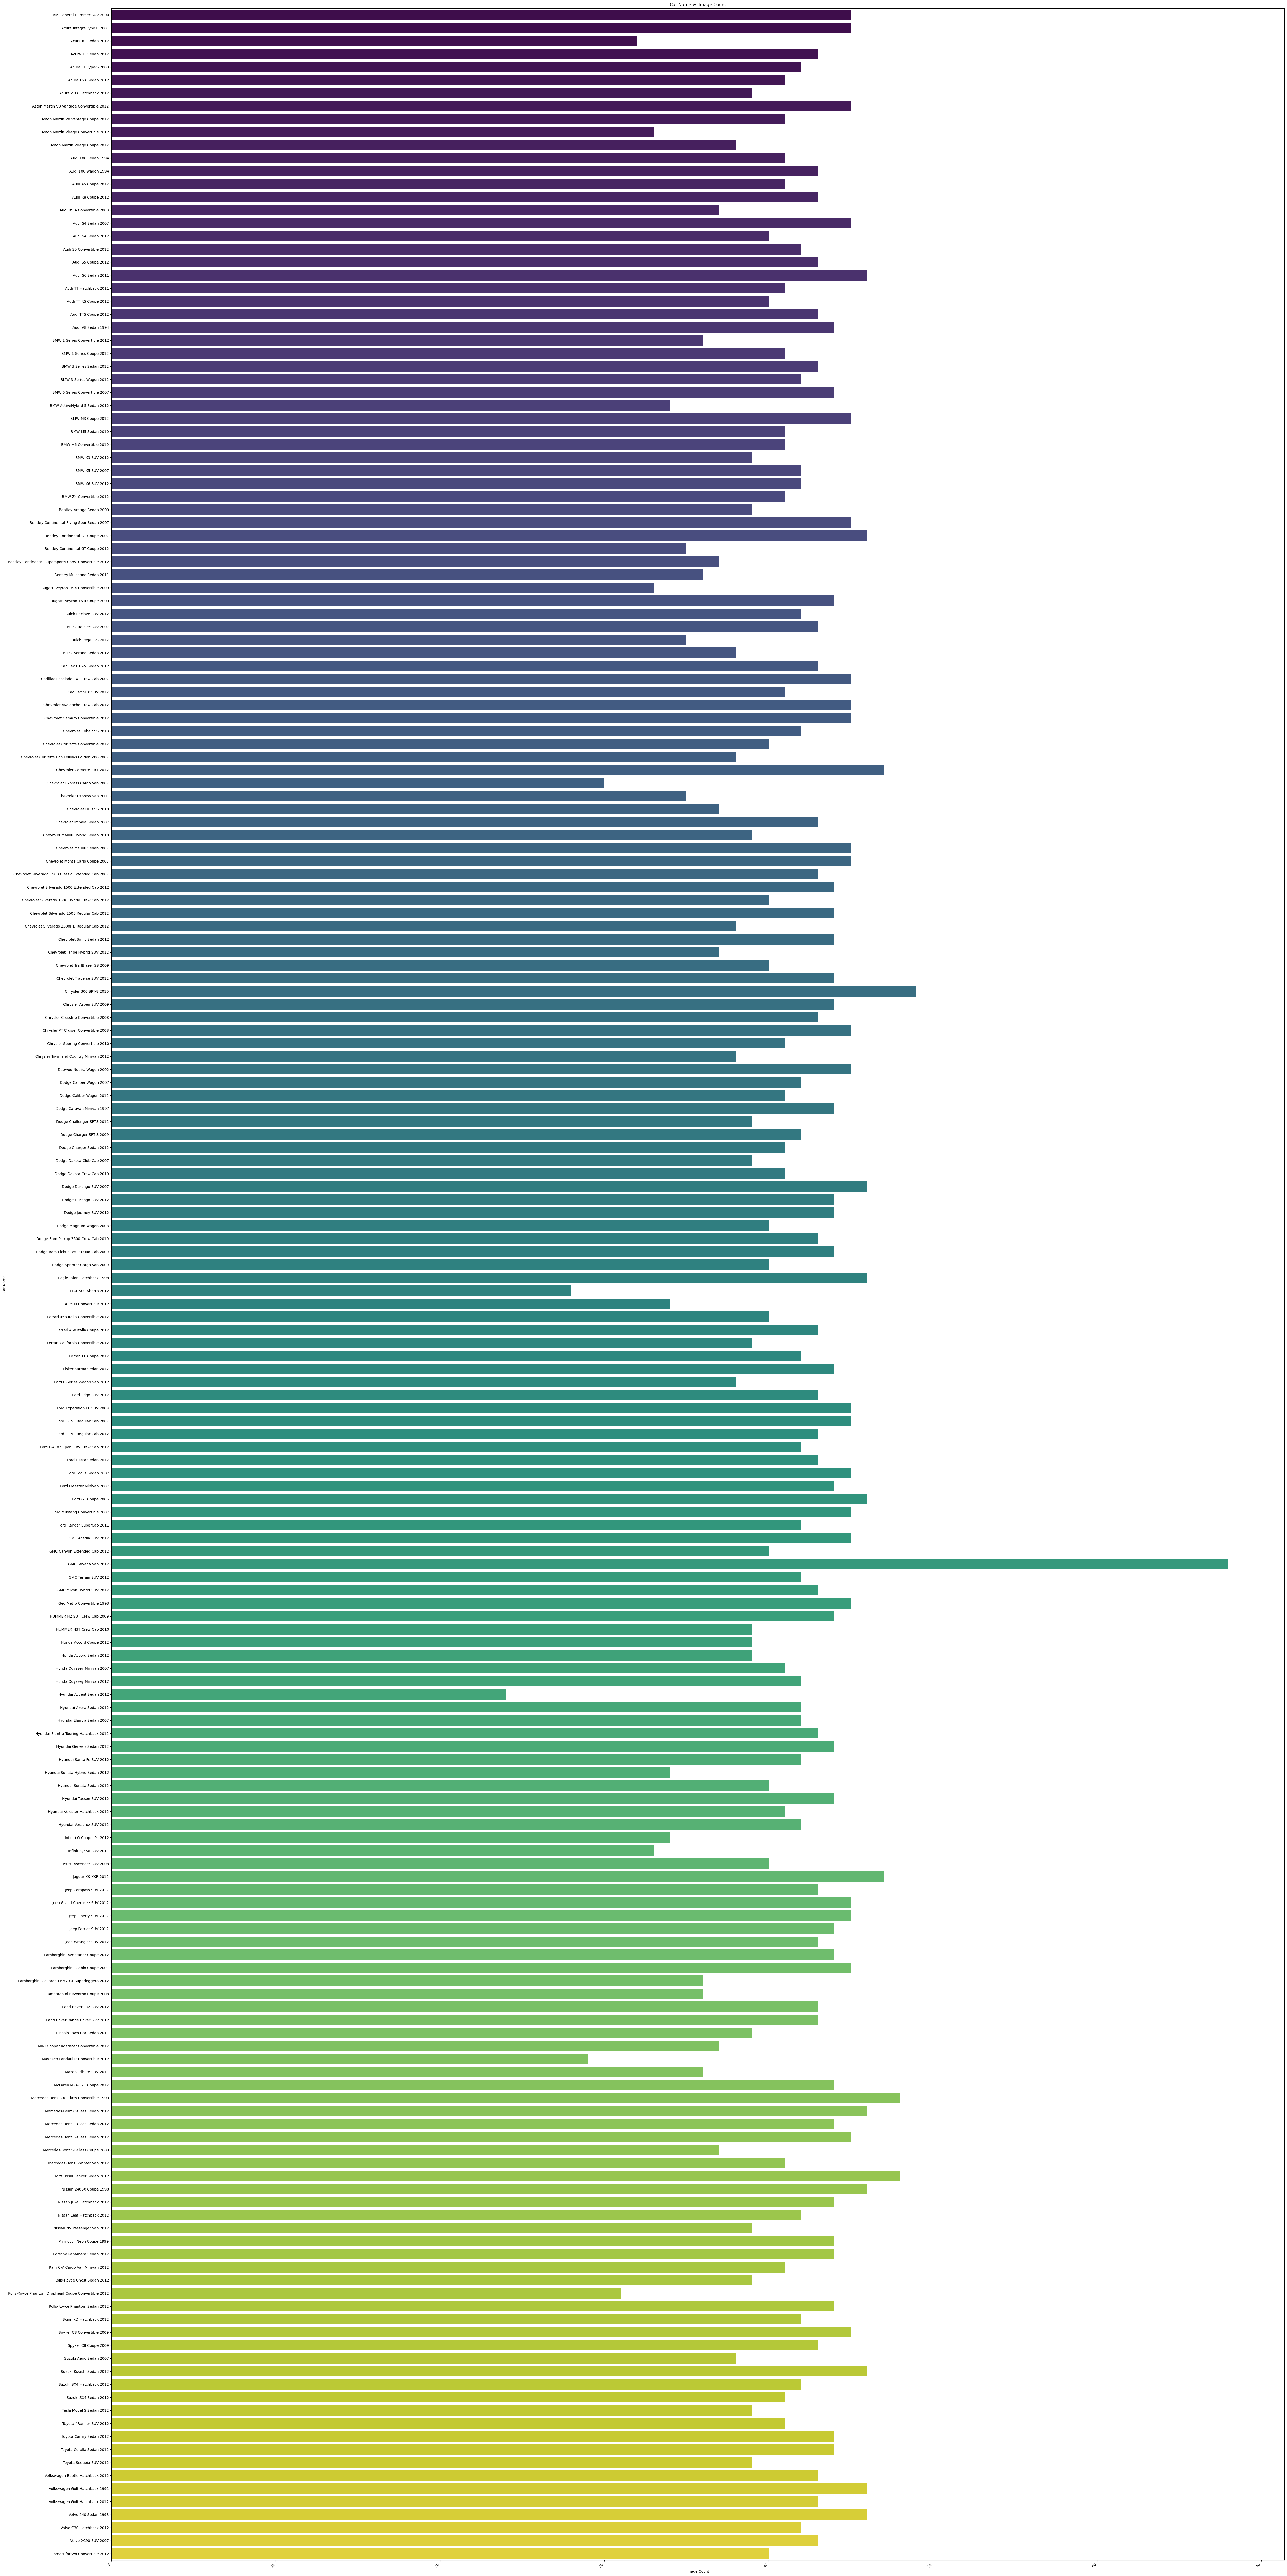

In [45]:
# --- Plot: Car Name vs Image Count using Seaborn ---
plt.figure(figsize=(50, 100))
sns.barplot(x='Image Count', y='Car Name', data=car_name_count, palette='viridis')
plt.ylabel('Car Name')
plt.xlabel('Image Count')
plt.title('Car Name vs Image Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

## 2B: Creating list of images for test data set

In [46]:
test_data = []
image_paths_test=[]
# Iterate through the directories and files
for folder_name in os.listdir(Zip_image_test_path):
    folder_path = os.path.join(Zip_image_test_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image_paths_test.append(image_path)
            # Append the folder name and image name to the data list
            test_data.append({
                'Car Name': folder_name.replace(r'\s*\d{4}$', ''), 
                'Model Year': folder_name.split()[-1],
                'Image Name': image_name
                }
            )

# Convert the list to a Pandas DataFrame
test_df = pd.DataFrame(test_data)

test_df.shape

(8041, 3)

In [47]:
test_df.head()

Car Name Model Year Image Name
0  Dodge Dakota Crew Cab 2010       2010  00318.jpg
1  Dodge Dakota Crew Cab 2010       2010  03773.jpg
2  Dodge Dakota Crew Cab 2010       2010  01206.jpg
3  Dodge Dakota Crew Cab 2010       2010  08018.jpg
4  Dodge Dakota Crew Cab 2010       2010  05448.jpg

In [48]:
test_df.tail()

Car Name Model Year Image Name
8036  Chevrolet Corvette ZR1 2012       2012  07450.jpg
8037  Chevrolet Corvette ZR1 2012       2012  07518.jpg
8038  Chevrolet Corvette ZR1 2012       2012  02893.jpg
8039  Chevrolet Corvette ZR1 2012       2012  06161.jpg
8040  Chevrolet Corvette ZR1 2012       2012  07109.jpg

**Grouping the data set based on the car calss.**

In [50]:
grouped_test_df = test_df.groupby(['Car Name', 'Model Year']).size().reset_index(name='Image Count')
grouped_test_df.shape

(196, 3)

**Insights on the grouping data**
* There seems to 196 unique car classes available througout the given dataset

In [51]:
grouped_test_df.head()

Car Name Model Year  Image Count
0  AM General Hummer SUV 2000       2000           44
1   Acura Integra Type R 2001       2001           44
2         Acura RL Sedan 2012       2012           32
3         Acura TL Sedan 2012       2012           43
4        Acura TL Type-S 2008       2008           42

**Sorting the grouped data to get an overall view on high and low data set availablitliy for any given class**

In [53]:
grouped_test_df.sort_values(by='Image Count', ascending=False, inplace=True)
print(grouped_test_df.head(1))
print(grouped_test_df.tail(1))

                Car Name Model Year  Image Count
119  GMC Savana Van 2012       2012           68
                      Car Name Model Year  Image Count
129  Hyundai Accent Sedan 2012       2012           24


**Insights on the above data**
* GMC Savana Van of model year 2012 seems to have the most number of images for training set.
* Hyundai Accent Sedan 2012 seems to have the lowest number of images for the training set.

### Data Visualization for testing set

**Plotting bar char to identify the total training set for a car class belonging to available model years**

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/3985844054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model Year', y='Image Count', data=model_year_count, palette='coolwarm')


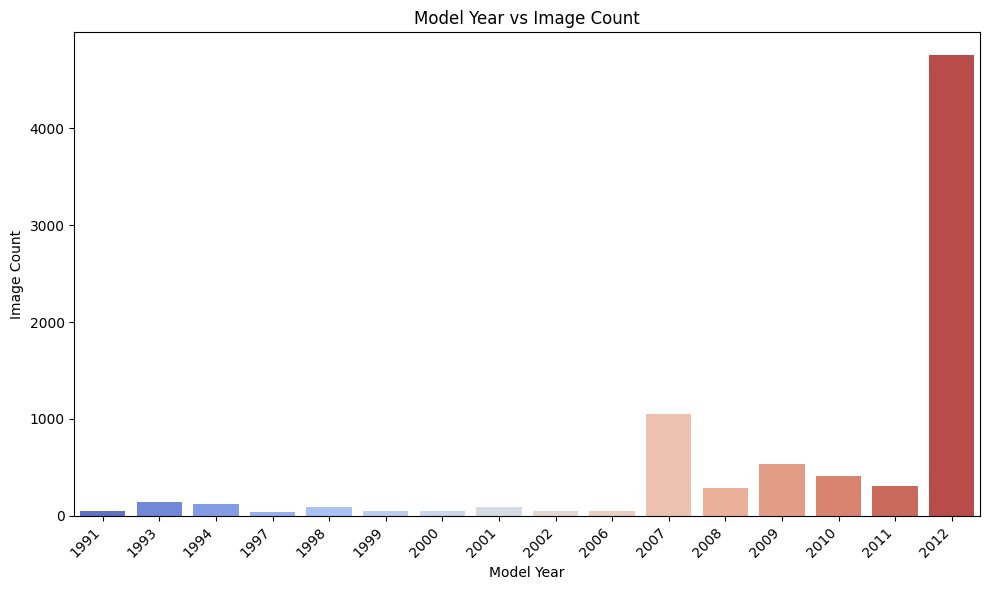

In [54]:
%matplotlib inline
model_year_count = test_df.groupby('Model Year').size().reset_index(name='Image Count')

# --- Plot: Model Year vs Image Count using Seaborn ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Year', y='Image Count', data=model_year_count, palette='coolwarm')
plt.xlabel('Model Year')
plt.ylabel('Image Count')
plt.title('Model Year vs Image Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**Insights from the above bar chart**
* most of the images sets seems to be of car class with model year 2012 and 2007.
* Rest of the model year data seems to be evently distrubuted across two batches, one is 2008 to 2011 and the other one is 1500 to 2006 followed by 2500 to 3500.
* There seems to be an unusal year data like 1500, 2500 and 3500 which seems like an outlier inthe given data set. Data cleaning should be performed to remove such outliers.

**Plotting  car name and count the number of images per car**

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/3850393585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car Name', y='Image Count', data=car_name_count, palette='viridis')


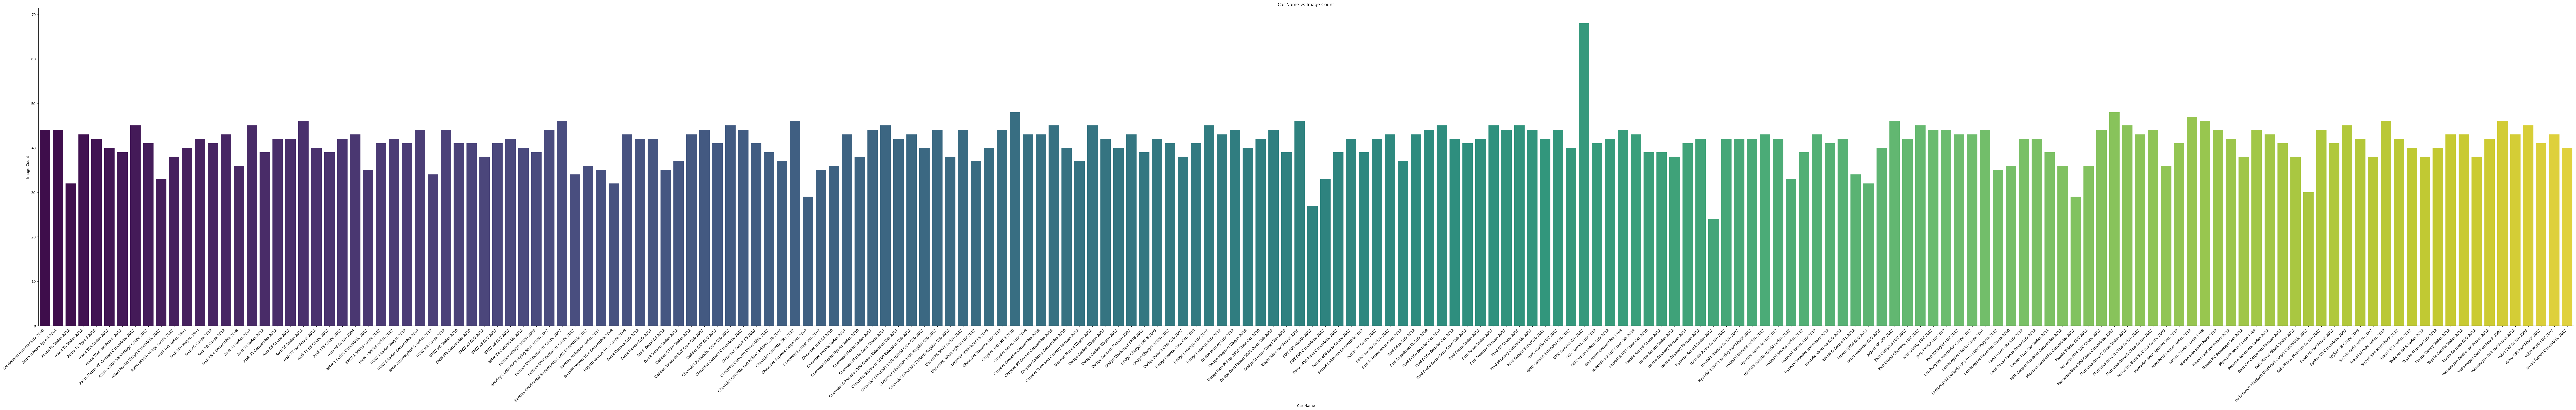

In [55]:
# Group by car name and count the number of images per car
car_name_count = test_df.groupby('Car Name')['Image Name'].count().reset_index(name='Image Count')

# --- Plot: Car Name vs Image Count using Seaborn ---
plt.figure(figsize=(100, 16))
sns.barplot(x='Car Name', y='Image Count', data=car_name_count, palette='viridis')
plt.xlabel('Car Name')
plt.ylabel('Image Count')
plt.title('Car Name vs Image Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/vt/fl3sg6gd7175pm9vtrw0nkh40000gn/T/ipykernel_7612/779336639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image Count', y='Car Name', data=car_name_count, palette='viridis')


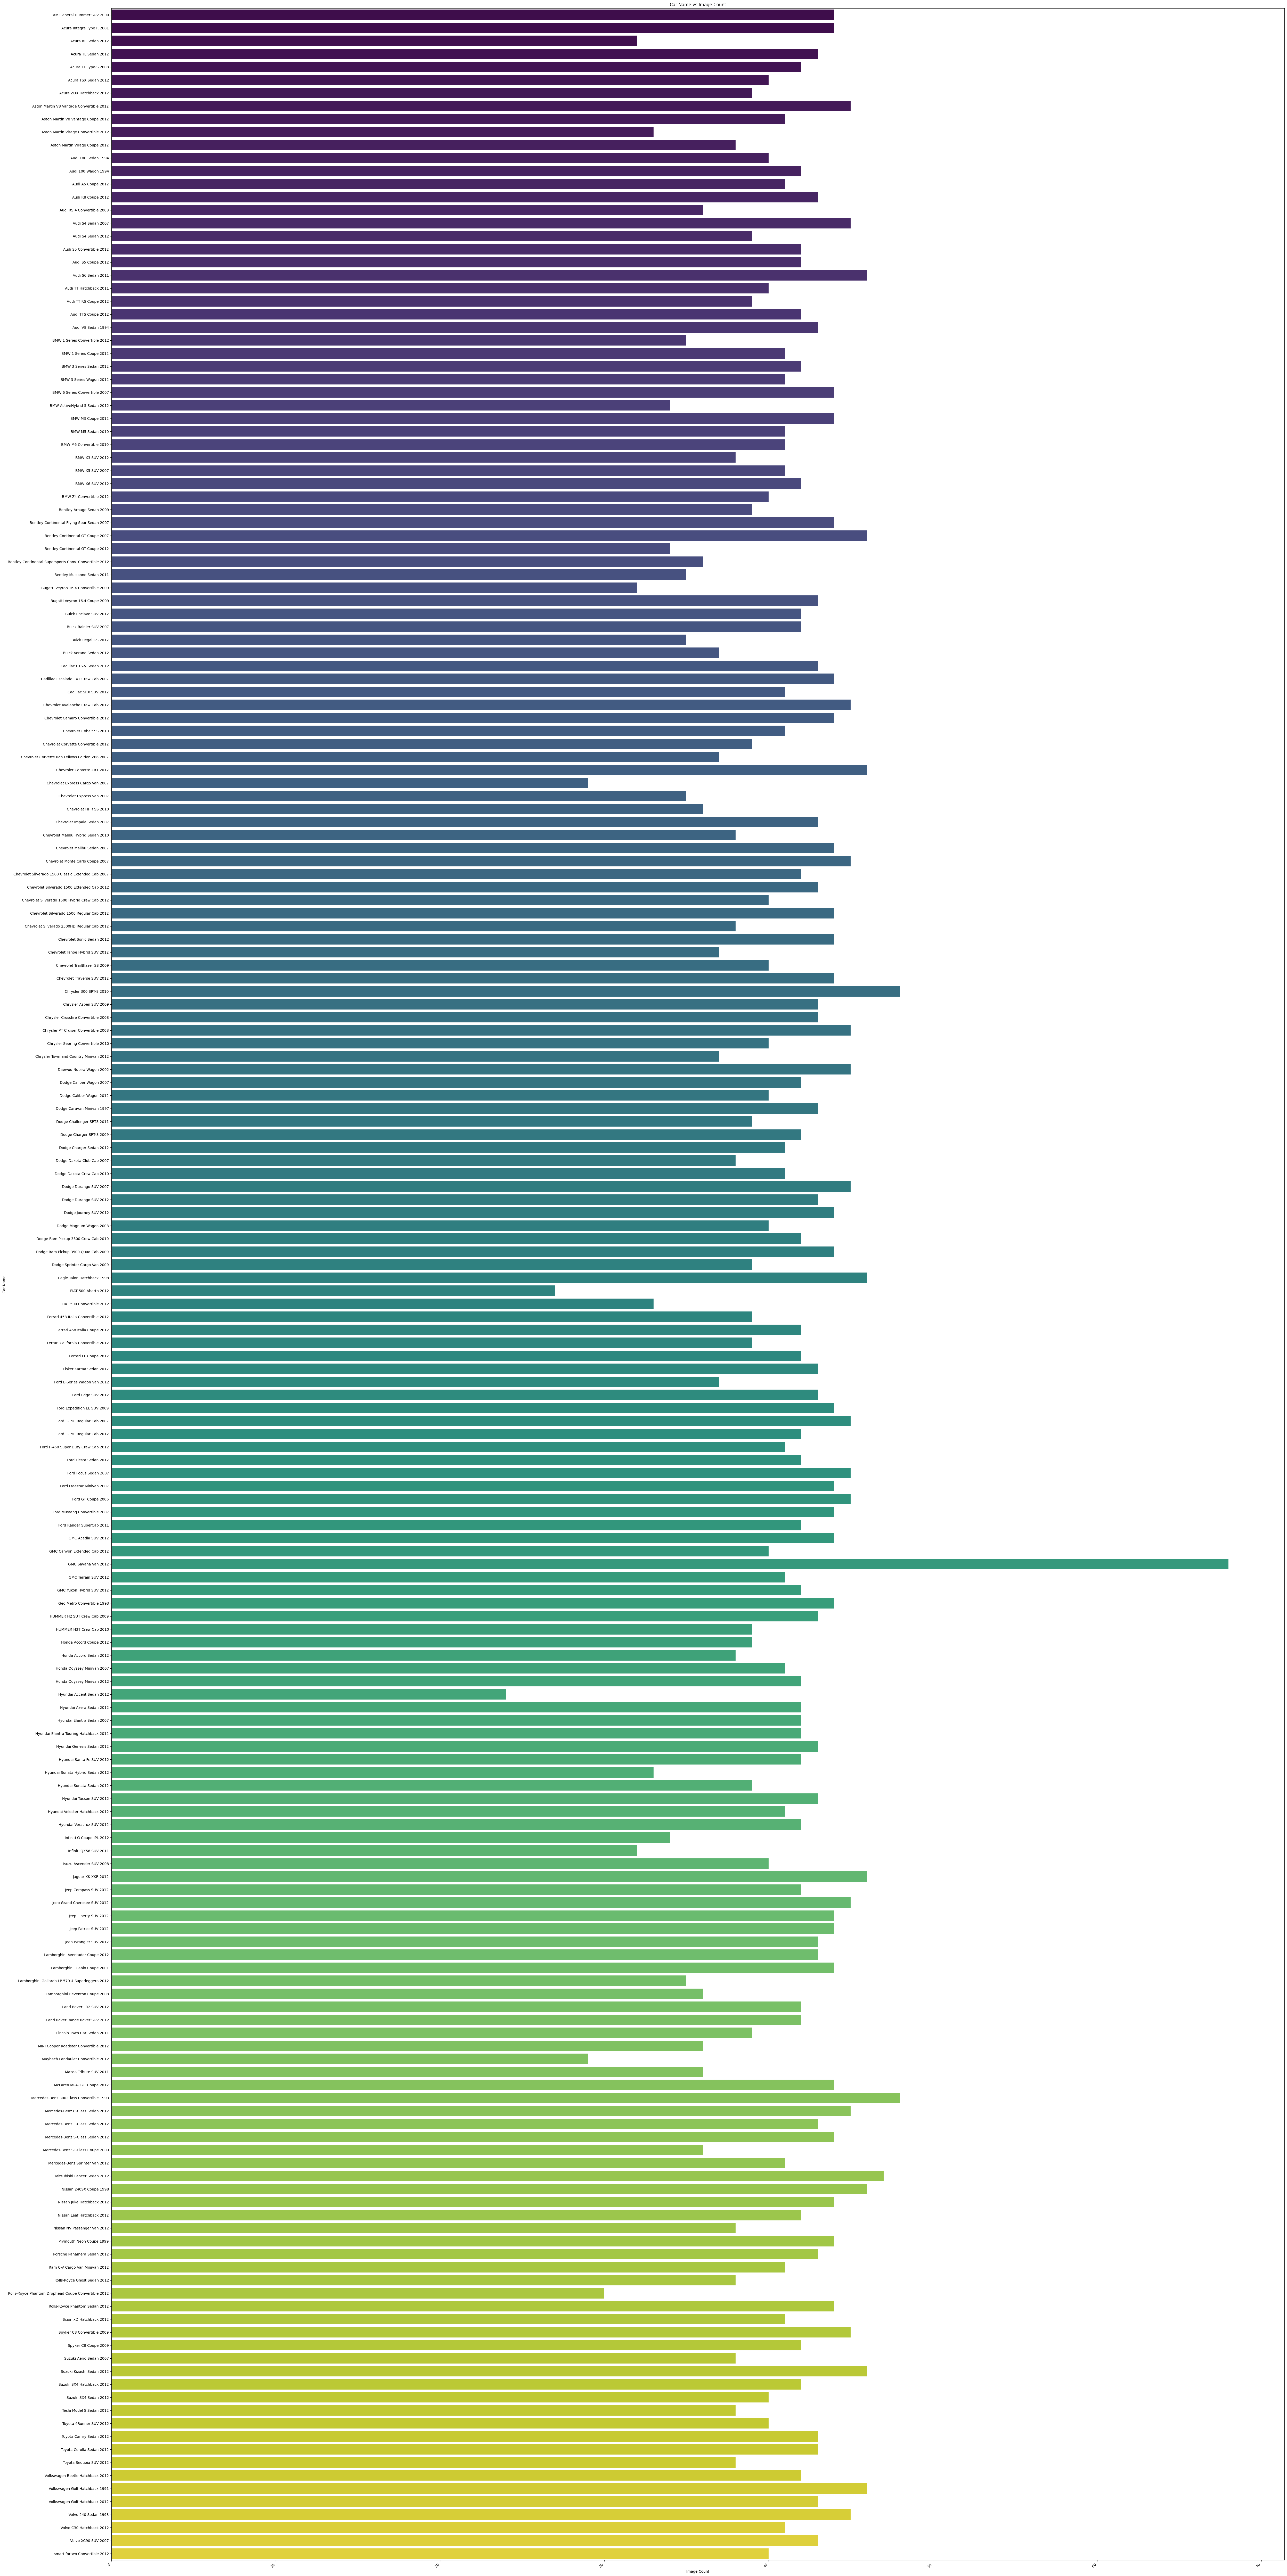

In [56]:
# --- Plot: Car Name vs Image Count using Seaborn ---
plt.figure(figsize=(50, 100))
sns.barplot(x='Image Count', y='Car Name', data=car_name_count, palette='viridis')
plt.ylabel('Car Name')
plt.xlabel('Image Count')
plt.title('Car Name vs Image Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [62]:
print(f"Total number of images in train dataset: {train_df['Image Name'].count()}")
print(f"Total number of images in test dataset: {test_df['Image Name'].count()}")

Total number of images in train dataset: 8144
Total number of images in test dataset: 8041


In [67]:
merged_df = grouped_train_df.merge(grouped_test_df, on='Car Name', suffixes=('_df1', '_df2'))
merged_df['Count Difference'] = merged_df['Image Count_df1'] - merged_df['Image Count_df2']
missing_images = merged_df[merged_df['Count Difference'] > 0]

print(missing_images)

print(merged_df[['Car Name', 'Count Difference']])

                                              Car Name Model Year_df1  \
1                              Chrysler 300 SRT-8 2010           2010   
3                         Mitsubishi Lancer Sedan 2012           2012   
4                                   Jaguar XK XKR 2012           2012   
5                          Chevrolet Corvette ZR1 2012           2012   
8                                   Ford GT Coupe 2006           2006   
..                                                 ...            ...   
187               Bugatti Veyron 16.4 Convertible 2009           2009   
188                             Infiniti QX56 SUV 2011           2011   
191  Rolls-Royce Phantom Drophead Coupe Convertible...           2012   
192                   Chevrolet Express Cargo Van 2007           2007   
194                               FIAT 500 Abarth 2012           2012   

     Image Count_df1 Model Year_df2  Image Count_df2  Count Difference  
1                 49           2010               

**Insights on the above analysis**

* Test data seems to have 103 images less than train data set.


## 3A extracting info from path from train data

In [ ]:
def extract_info_from_path(image_path):
    # Extract class and file name
    parts = image_path.split(os.sep)
    class_name = parts[-2]  # Folder name containing the class info
    file_name = parts[-1]   # Image file name
    return file_name, class_name

# Lists to store extracted information
file_names = []
classes = []
image_paths = []

# Walk through the directory and extract information
for root, dirs, files in os.walk(Zip_image_train_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Adjust based on image formats
            image_path = os.path.join(root, file)
            file_name, class_name = extract_info_from_path(image_path)
            file_names.append(file_name)
            classes.append(class_name)
            image_paths.append(image_path)

# Create a DataFrame
df_train = pd.DataFrame({
    'file_name': file_names,
    'image_path': image_paths,
    'class': classes
})

# Display the first few rows of the DataFrame
df_train.head()

In [ ]:
df_train.isnull().sum()

## 3B extracting path from test dataset

In [ ]:
def extract_info_from_path(image_path):
    # Extract class and file name
    parts = image_path.split(os.sep)
    class_name = parts[-2]  # Folder name containing the class info
    file_name = parts[-1]   # Image file name
    return file_name, class_name

# Lists to store extracted information
file_names = []
classes = []
image_paths = []

# Walk through the directory and extract information
for root, dirs, files in os.walk(Zip_image_test_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Adjust based on image formats
            image_path = os.path.join(root, file)
            file_name, class_name = extract_info_from_path(image_path)
            file_names.append(file_name)
            classes.append(class_name)
            image_paths.append(image_path)

# Create a DataFrame
df_test = pd.DataFrame({
    'file_name': file_names,
    'image_path': image_paths,
    'class': classes
})

# Display the first few rows of the DataFrame
df_test.head()

In [ ]:
df_test.isnull().sum()

## 4A diplaying images from train dataset

In [ ]:
import matplotlib.image as mpimg
# Number of images to display
num_images_to_display = 5

# Create a plot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    # Read the image
    img = mpimg.imread(df_train.iloc[i]['image_path'])
    
    # Display the image
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"{df_train.iloc[i]['class']}\n{df_train.iloc[i]['file_name']}", fontsize=10)
    ax.axis('off')  # Hide the axis

# Show the plot
#plt.tight_layout()
plt.show()

In [ ]:
df_train['class'].value_counts()

# countplot

In [ ]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
sns.countplot(x=df_train['class'])

In [ ]:
from PIL import Image
# Function to load images
def load_image(image_path):
    return Image.open(image_path)

# Extract image metadata such as size (width, height)
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size  # returns (width, height)

# Extract color histogram from images (distribution of pixel intensities)
def get_image_histogram(image_path):
    with Image.open(image_path) as img:
        return img.histogram()  # Returns the histogram as a flat list for each color channel


In [ ]:
df_train_analysis=df_train.copy()

In [ ]:
# Adding image size columns (width, height)
df_train_analysis['width'],df_train_analysis['height'] = zip(*df_train_analysis['image_path'].apply(get_image_size))

# histplot

In [ ]:
# EDA on Image Dimensions
plt.figure(figsize=(10, 6))
sns.histplot(df_train_analysis['width'], kde=True, color='blue', label='Width',bins=200)
plt.title('Distribution of Image Width')
plt.xlim(0,5000)
plt.legend()
plt.show()


In [ ]:
# EDA on Image Dimensions
plt.figure(figsize=(10, 6))
sns.histplot(df_train_analysis['height'], kde=True, color='red', label='Height')
plt.title('Distribution of Image Width')
plt.legend()
plt.show()


In [ ]:
# Example Univariate Analysis: Plot image color histograms
def plot_image_histogram(image_path, image_title):
    image = Image.open(image_path)
    histogram = image.histogram()
    
    plt.figure(figsize=(8, 4))
    plt.title(f'Color Histogram: {image_title}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        plt.plot(histogram[i*256:(i+1)*256], color=color)
    plt.show()

In [ ]:
# Plot histogram of a random image in the dataset
sample_image = df_train_analysis['image_path'].iloc[0]
plot_image_histogram(sample_image, df_train_analysis['file_name'].iloc[0])


In [ ]:
# Descriptive statistics for image sizes
print("\nDescriptive Statistics for Image Sizes:")
df_train_analysis[['width', 'height']].describe().T


In [ ]:
# Correlation between width and height
plt.figure(figsize=(6, 6))
sns.scatterplot(x='width', y='height', data=df_train_analysis)
plt.title('Correlation between Image Width and Height')
plt.show()

# checking is there any image having non 3d channel

In [ ]:
channel_images=[]
def check_image_type_and_channels(image_paths):
    for img_path in image_paths:
        try:
            with Image.open(img_path) as img:
                img_type = img.format
                img_mode = img.mode  # Mode gives the channel type (e.g., 'RGB', 'L', 'RGBA')
                channels = len(img.getbands())  # Number of channels based on mode
                print(f"Image: {img_path}")
                print(f"Type: {img_type}")
                print(f"Channels: {channels} (Mode: {img_mode})")
                print("-" * 30)
                if channels!=3:
                    channel_images.append(img_path)
        except Exception as e:
            print(f"Error with image {img_path}: {e}")

# Call the function
check_image_type_and_channels(df_train['image_path'])
print(channel_images)

In [ ]:
def display_images(image_paths):
    for img_path in image_paths:
        try:
            # Open the image
            img = Image.open(img_path)
            # Display the image
            img_type = img.format
            img_mode = img.mode 
            #print(f"Type: {img_type}")
            #print(f"Channels: {channels} (Mode: {img_mode})")
            #print("-" * 30)
            plt.imshow(img)
            plt.title(f"Image: {img_path}, Mode: {img.mode}")
            plt.axis('off')  # Hide the axes
            plt.show()
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")

# Display images that don't have 3 channels
display_images(channel_images)

## 4B diplaying images from test dataset

In [ ]:
import matplotlib.image as mpimg
# Number of images to display
num_images_to_display = 5

# Create a plot
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))

for i in range(num_images_to_display):
    # Read the image
    img = mpimg.imread(df_test.iloc[i]['image_path'])
    
    # Display the image
    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"{df_test.iloc[i]['class']}\n{df_test.iloc[i]['file_name']}", fontsize=10)
    ax.axis('off')  # Hide the axis

# Show the plot
#plt.tight_layout()
plt.show()

In [ ]:
df_test['class'].value_counts()

In [ ]:
plt.figure(figsize=(30,5))
plt.xticks(rotation=90)
sns.countplot(x=df_test['class'])

In [ ]:
df_test_analysis=df_test.copy()

In [ ]:
# Adding image size columns (width, height)
df_test_analysis['width'],df_test_analysis['height'] = zip(*df_test_analysis['image_path'].apply(get_image_size))

# histplot

In [ ]:
# EDA on Image Dimensions
plt.figure(figsize=(10, 6))
sns.histplot(df_test_analysis['width'], kde=True, color='blue', label='Width',bins=200)
plt.title('Distribution of Image Width')
plt.xlim(0,5000)
plt.legend()
plt.show()


In [ ]:
# EDA on Image Dimensions
plt.figure(figsize=(10, 6))
sns.histplot(df_test_analysis['height'], kde=True, color='red', label='Height')
plt.title('Distribution of Image Width')
plt.legend()
plt.show()


In [ ]:
# Plot histogram of a random image in the dataset
sample_image = df_test_analysis['image_path'].iloc[0]
plot_image_histogram(sample_image, df_test_analysis['file_name'].iloc[0])


In [ ]:
# Descriptive statistics for image sizes
print("\nDescriptive Statistics for Image Sizes:")
df_test_analysis[['width', 'height']].describe().T


In [ ]:
# Correlation between width and height
plt.figure(figsize=(6, 6))
sns.scatterplot(x='width', y='height', data=df_test_analysis)
plt.title('Correlation between Image Width and Height')
plt.show()

## 5A Map training images to its classes.

In [ ]:
df_name_make = pd.read_csv(r"E:\Greatlearning- Projects\AIML project capstone project\Car names and make.csv",header=None)
df_name_make = pd.DataFrame(df_name_make)
df_name_make[:5]

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
def missing_name(df,df_name_make):

   # Optionally, check if these car names exist in the df_name_make_copy DataFrame
    unique_car_names = set(df['class'])
    existing_car_names = set(df_name_make[0])
    missing_car_names = unique_car_names - existing_car_names
    return missing_car_names

In [ ]:
missing_car_names_train= missing_name(df_train,df_name_make)
missing_car_names_test= missing_name(df_test,df_name_make)

In [ ]:
print(f"Missing car names in train: {missing_car_names_train}")
print(f"Missing car names in test: {missing_car_names_test}")

In [ ]:
# Update the car name in the DataFrame
df_name_make[0] = df_name_make[0].replace(
    'Ram C/V Cargo Van Minivan 2012', 'Ram C-V Cargo Van Minivan 2012')

# Verify the change
print(df_name_make[df_name_make[0] == 'Ram C-V Cargo Van Minivan 2012'])

In [ ]:
missing_car_names_train= missing_name(df_train,df_name_make)
missing_car_names_test= missing_name(df_test,df_name_make)

print(f"Missing car names in train data: {missing_car_names_train}")
print(f"Missing car names in test data: {missing_car_names_test}")

In [ ]:
df_train.head()

In [ ]:

df_test.head()

## 6A mapping class in image train data

In [ ]:
# Assuming df and df_make_name are already defined

# Step 1: Assign numerical IDs to each unique value in df_make_name
df_name_make['make_id'] = df_name_make.index

# Step 2: Create a dictionary to map the car model to its numerical ID
make_dict = pd.Series(df_name_make['make_id'].values, index=df_name_make[0]).to_dict()

# Step 3: Create a function to map the class value in df to the corresponding numerical ID
def map_make_id(class_value, make_dict):
    for make_name in make_dict:
        if make_name in class_value:
            return make_dict[make_name]
    return None  # In case no match is found

# Step 4: Apply the mapping function to the class column in df
df_train['make_id'] = df_train['class'].apply(lambda x: map_make_id(x, make_dict))

# Output the updated dataframe
df_train

In [ ]:
df_train['make_id'].isnull().any()

In [ ]:
df_train['make_id'].unique()

In [ ]:
from keras.utils import to_categorical

# Assuming your make_id column contains the numerical labels
y_train = df_train['make_id']

# One-Hot Encode the make_id column
num_classes = 196  # Since you have 196 unique classes (0 to 195)
y_train_onehot = to_categorical(y_train, num_classes=num_classes)

# Now y_train_onehot contains the one-hot encoded labels
# Should give (num_samples, 196)
print(y_train_onehot.shape)  

In [ ]:
y_train_onehot

In [ ]:
y_train_onehot[192]

In [ ]:
# Convert y_train_onehot to a TensorFlow tensor
import tensorflow as tf

y_train_tensor = tf.convert_to_tensor(y_train_onehot, dtype=tf.float32)
y_test_tensor=tf.convert_to_tensor(y_test_onehot, dtype=tf.float32)
# Check the shape to confirm it's converted correctly
print(y_train_tensor.shape)  # Should print (8144, 196)
print(y_test_tensor.shape)

## 6B mapping class in image test data

In [ ]:
# Assuming df and df_make_name are already defined

# Step 1: Assign numerical IDs to each unique value in df_make_name
df_name_make['make_id'] = df_name_make.index

# Step 2: Create a dictionary to map the car model to its numerical ID
make_dict = pd.Series(df_name_make['make_id'].values, index=df_name_make[0]).to_dict()

# Step 3: Create a function to map the class value in df to the corresponding numerical ID
def map_make_id(class_value, make_dict):
    for make_name in make_dict:
        if make_name in class_value:
            return make_dict[make_name]
    return None  # In case no match is found

# Step 4: Apply the mapping function to the class column in df
df_test['make_id'] = df_test['class'].apply(lambda x: map_make_id(x, make_dict))

# Output the updated dataframe
df_test

In [ ]:
df_test['make_id'].isnull().any()

In [ ]:
df_test['make_id'].unique()

## 7A mapping Annotation train data

In [ ]:
zipped_annot_path=r"E:\Greatlearning- Projects\AIML project capstone project\Annotations.zip"
unziped_annot_path=r"E:\Greatlearning- Projects\AIML project capstone project\Extracted  zip  files\extracted zipfile for anotation"


In [ ]:
os.makedirs(unziped_annot_path,exist_ok = True)
  

In [ ]:
with zipfile.ZipFile(zipped_annot_path,'r') as ref_annot:
    ref_annot.extractall(unziped_annot_path)

In [ ]:
print(f"files of annot extracted to = {unziped_annot_path}")

In [ ]:
train_annot_data=pd.read_csv(r"E:\Greatlearning- Projects\AIML project capstone project\Extracted  zip  files\extracted zipfile for anotation\Annotations\Train Annotations.csv")
test_annot_data=pd.read_csv(r"E:\Greatlearning- Projects\AIML project capstone project\Extracted  zip  files\extracted zipfile for anotation\Annotations\Test Annotation.csv")

In [ ]:
train_annot_data.head()

In [ ]:
print(train_annot_data['Image class'].unique())

In [ ]:
# Renaming columns for better understanding
train_annot_data.rename(columns={'Bounding Box coordinates': 'x_min','Unnamed: 2': 'y_min', 'Unnamed: 3': 'x_max', 'Unnamed: 4': 'y_max'}, inplace=True)

# Now the dataframe should have the proper column names
print(train_annot_data.head())

In [ ]:
len(train_annot_data['Image Name'])

In [ ]:
# Step 1: Rename the columns to have a common key for merging
train_annot_data.rename(columns={'Image Name': 'file_name'}, inplace=True)

In [ ]:
# Step 2: Merge annotation data with df on 'file_name'
df_merged_train = pd.merge(df_train, train_annot_data, on='file_name', how='left')


In [ ]:
df_merged_train.head()

In [ ]:
len(df_merged_train['file_name'])

In [ ]:
df_merged_train['Image class'].unique()

In [ ]:
df_merged_train.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder



In [ ]:
# Assuming your make_id column contains the numerical labels

from keras.utils import to_categorical

# Apply the same encoder on the test labels
y_test_encoded=df_test['make_id']

# One-Hot Encode the make_id column
num_classes = 196  # Since you have 196 unique classes (0 to 195)

# One-hot encode the test labels using the same number of classes
y_test_onehot = to_categorical(y_test_encoded,num_classes=196)




In [ ]:
y_test_onehot.shape

## 7B mapping Annotation test data

In [ ]:
test_annot_data.head()

In [ ]:
print(test_annot_data['Image class'].unique())

In [ ]:
# Renaming columns for better understanding
test_annot_data.rename(columns={'Bounding Box coordinates': 'x_min','Unnamed: 2': 'y_min', 'Unnamed: 3': 'x_max', 'Unnamed: 4': 'y_max'}, inplace=True)

# Now the dataframe should have the proper column names
print(test_annot_data.head())

In [ ]:
len(test_annot_data['Image Name'])

In [ ]:
# Step 1: Rename the columns to have a common key for merging
test_annot_data.rename(columns={'Image Name': 'file_name'}, inplace=True)

In [ ]:
# Step 2: Merge annotation data with df on 'file_name'
df_merged_test = pd.merge(df_test, test_annot_data, on='file_name', how='left')


In [ ]:
df_merged_test.head()

In [ ]:
len(df_merged_test['file_name'])

In [ ]:
df_merged_test['Image class'].unique()

##  8A displaying bounding box train data

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os

def display_images_with_bounding_boxes(df, image_paths, num_images=5):
    # Ensure 'filename' and 'Bounding Box' columns are present
    for idx, row in df.head(num_images).iterrows():
        # Extract filename from row
        filename = row['file_name']
        
        # Find the corresponding image path
        image_path = [path for path in image_paths if os.path.basename(path) == filename]
        if not image_path:
            print(f"No path found for filename: {filename}")
            continue
        image_path = image_path[0]

        # Open the image
        image = Image.open(image_path)
        draw = ImageDraw.Draw(image)

        # Draw the bounding box
        bbox = (row['x_min'], row['y_min'], row['x_max'], row['y_max'])
        draw.rectangle(bbox, outline='red', width=4)

        # Display the image
        plt.imshow(image)
        plt.title(f"Filename: {filename}")
        plt.axis('off')
        plt.show()

# Example usage:
display_images_with_bounding_boxes(df_merged_train, df_merged_train['image_path'], num_images=100)

##  8B displaying bounding box test data

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os

def display_images_with_bounding_boxes(df, image_paths, num_images=5):
    # Ensure 'filename' and 'Bounding Box' columns are present
    for idx, row in df.head(num_images).iterrows():
        # Extract filename from row
        filename = row['file_name']
        
        # Find the corresponding image path
        image_path = [path for path in image_paths if os.path.basename(path) == filename]
        if not image_path:
            print(f"No path found for filename: {filename}")
            continue
        image_path = image_path[0]

        # Open the image
        image = Image.open(image_path)
        draw = ImageDraw.Draw(image)

        # Draw the bounding box
        bbox = (row['x_min'], row['y_min'], row['x_max'], row['y_max'])
        draw.rectangle(bbox, outline='red', width=4)

        # Display the image
        plt.imshow(image)
        plt.title(f"Filename: {filename}")
        plt.axis('off')
        plt.show()

# Example usage:
display_images_with_bounding_boxes(df_merged_test, df_merged_test['image_path'], num_images=100)

# lets check imbalnce of dat set

In [ ]:
# Define paths
train_dir = r"E:\Greatlearning- Projects\AIML project capstone project\Extracted zip files\extracted zipfile for images\Car Images\Train Images"  # Replace with your path
test_dir = r"E:\Greatlearning- Projects\AIML project capstone project\Extracted zip files\extracted zipfile for images\Car Images\Test Images"    # Replace with your path

# Count images per class in train and test folders
def count_images_in_folders(directory):
    class_counts = {}
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

train_class_counts = count_images_in_folders(train_dir)
test_class_counts = count_images_in_folders(test_dir)

# Convert to a sorted list for easy comparison
train_counts_sorted = sorted(train_class_counts.items(), key=lambda x: x[1], reverse=True)
test_counts_sorted = sorted(test_class_counts.items(), key=lambda x: x[1], reverse=True)

# Plot class distribution for training data
plt.figure(figsize=(20, 6))
plt.title('Class Distribution in Training Data')
sns.barplot(x=[x[0] for x in train_counts_sorted], y=[x[1] for x in train_counts_sorted])
plt.xticks(rotation=90)
plt.ylabel('Number of Images')
plt.show()

# Plot class distribution for testing data
plt.figure(figsize=(20, 6))
plt.title('Class Distribution in Testing Data')
sns.barplot(x=[x[0] for x in test_counts_sorted], y=[x[1] for x in test_counts_sorted])
plt.xticks(rotation=90)
plt.ylabel('Number of Images')
plt.show()

## 9A preprocessing for train

In [ ]:
# Function to preprocess images: resize, convert to RGB, and normalize
def preprocess_train(image_paths_tr, target_size=(150, 150)):
    processed_images_train = []
    
    for img_path_tr in image_paths_tr:
        try:
            # Open the image
            img = Image.open(img_path_tr)
            
            # Convert to RGB if the image is not in 3 channels
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize the image to the target size
            img = img.resize(target_size)
            
            # Convert the image to a numpy array
            img_array = np.array(img)
            
            # Normalize the pixel values to be between 0 and 1
            img_array = img_array / 255.0
            
            # Append the preprocessed image
            processed_images_train.append(img_array)
        
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
    
    return np.array(processed_images_train)

# Preprocess all the images (including those with non-3 channels)
preprocessed_images_train = preprocess_train(df_merged_train['image_path'])

# Check the shape of preprocessed images (it should be of shape (num_images, 150, 150, 3))
print(preprocessed_images_train.shape)

## 9B preprocessing for test

In [ ]:
# Function to preprocess images: resize, convert to RGB, and normalize
def preprocess_test(image_paths_ts, target_size=(150, 150)):
    processed_images_test = []
    
    for img_path in image_paths_ts:
        try:
            # Open the image
            img = Image.open(img_path)
            
            # Convert to RGB if the image is not in 3 channels
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize the image to the target size
            img = img.resize(target_size)
            
            # Convert the image to a numpy array
            img_array = np.array(img)
            
            # Normalize the pixel values to be between 0 and 1
            img_array = img_array / 255.0
            
            # Append the preprocessed image
            processed_images_test.append(img_array)
        
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
    
    return np.array(processed_images_test)

# Preprocess all the images (including those with non-3 channels)
preprocessed_images_test = preprocess_test(df_merged_test['image_path'])

# Check the shape of preprocessed images (it should be of shape (num_images, 224, 224, 3))
print(preprocessed_images_test.shape)

# preparing X,Y variable for train dataset

In [ ]:
# X is your preprocessed image data
X_train = preprocessed_images_train  # Shape: (8144, 224, 224, 3)
# y is your target labels
y_train = y_train_tensor # Shape: (8144,)
# Check shapes
print(f"X_train shape: {X_train.shape}")  # (8144, 224, 224, 3)
print(f"y_train shape: {y_train.shape}")  # (8144,)

In [ ]:
 df_merged_train['make_id'].values

In [ ]:
df_merged_train['make_id'].unique()

In [ ]:
# X is your preprocessed image data
X_test = preprocessed_images_test  # Shape: (8041, 224, 224, 3)
# y is your target labels
y_test = y_test_tensor  # Shape: (8041,)
# Check shapes
print(f"X_test shape: {X_test.shape}")  # (8041, 224, 224, 3)
print(f"y_test shape: {y_test.shape}")  # (8041,)

In [ ]:
# Adjust the labels to be 0-based
#y_train_adjusted = y_train - 1
#y_test_adjusted = y_test - 1

# Check the adjusted labels
#unique_labels_adjusted = np.unique(y_train_adjusted)
#print(f"Adjusted unique labels: {unique_labels_adjusted}")

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define your model architecture
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(196, activation='softmax')  # Ensure this matches the number of unique classes  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Convert one-hot encoded y_train_tensor back to integer labels for computing class weights
y_train_integers = np.argmax(y_train_tensor, axis=1)


class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train_integers), y=y_train_integers
)
class_weights_dict = dict(enumerate(class_weights))

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.50),  # Add dropout to prevent overfitting
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.50),  # Add dropout to prevent overfitting
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.50),  # Add dropout to prevent overfitting
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.50),  # Add dropout to prevent overfitting
    Dense(196, activation='softmax')
])

model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

history = model1.fit(X_train, y_train_tensor, batch_size=32, epochs=20,class_weight=class_weights_dict, validation_data=(X_test, y_test_tensor))

In [ ]:
from tensorflow.keras.applications import VGG16
base_mode = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

model2 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(196, activation='softmax')
])

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(X_train.shape)  # Should be (8144, 150, 150, 3)
print(X_test.shape)   # Should be (8041, 150, 150, 3)
print(y_train_integers.shape)  # Should be (8144,)
print(np.argmax(y_test_tensor, axis=1).shape)  # Should be (8041,)

In [ ]:
validation_data = (X_test, np.argmax(y_test_tensor, axis=1))
validation_data 

In [ ]:
import numpy as np

print(np.isnan(X_train).sum())  # Should be 0
print(np.isnan(X_test).sum())   # Should be 0
print(np.isnan(y_train_integers).sum())  # Should be 0
print(np.isnan(np.argmax(y_test_tensor, axis=1)).sum())  # Should be 0

In [ ]:
! pip install --upgrade tensorflow

In [ ]:
# Train the model
model2.fit(X_train, y_train_integers, epochs=50,class_weight=class_weights_dict, validation_data=(X_test, np.argmax(y_test_tensor,axis=1)))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# 11 intrim report Building  CNN architecture

# lets check imbalncing of classes

In [ ]:
car_class=[]
car_class=list(df_train['class'].unique())

In [ ]:
car_count=[]
car_count=list(df_train['class'].value_counts())

In [ ]:
df=pd.DataFrame({'class': car_class, 'count': car_count})

In [ ]:
df

In [ ]:
df['count'].max()

In [ ]:
car_class=[]
car_class=list(df_test['class'].unique())

In [ ]:
car_count=[]
car_count=list(df_test['class'].value_counts())

In [ ]:
df2=pd.DataFrame({'class': car_class, 'count': car_count})

In [ ]:
df2

In [ ]:
# Merge the training and test DataFrames on the "class" column
df_merged = pd.merge(df, df2, on='class', how='inner')

In [ ]:
df_merged.head()

In [ ]:
df_merged['difference']=df_merged['count_x']-df_merged['count_y']

In [ ]:
df_merged

In [ ]:
# Basic statistics for training and test datasets
train_mean = df_merged['count_x'].mean()
train_min = df_merged['count_x'].min()
train_max = df_merged['count_x'].max()

test_mean = df_merged['count_y'].mean()
test_min = df_merged['count_y'].min()
test_max = df_merged['count_y'].max()

print("Training data:")
print(f"Mean: {train_mean}, Min: {train_min}, Max: {train_max}")

print("\nTest data:")
print(f"Mean: {test_mean}, Min: {test_min}, Max: {test_max}")

# Plot the distribution of image counts for each class
plt.figure(figsize=(12, 6))

# Train data distribution
plt.subplot(1, 2, 1)
plt.hist(df_merged['count_x'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Train Images per Class')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')

# Test data distribution
plt.subplot(1, 2, 2)
plt.hist(df_merged['count_y'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Test Images per Class')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Compute class weights
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Define and compile your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights_dict, validation_data=(X_test, y_test)